In [1]:
#python 
import scipy.io as sio 
import numpy as np
import matplotlib.pyplot as plt
import random

### Problem One

In [2]:
#Load data
mat = sio.loadmat('fisheriris.mat')
X_original = mat.get('meas')
Y_original = mat.get('species')
#Separate types of flower
X_1, Y_1 = X_original[:50], Y_original[:50]
X_2, Y_2 = X_original[50:100], Y_original[50:100]
X_3, Y_3 = X_original[100:], Y_original[100:]
#Index lists
indices_1 = list(range(len(X_1)))
indices_2 = list(range(len(X_1)))
indices_3 = list(range(len(X_1)))
#Shuffle entries
random.shuffle(indices_1)
random.shuffle(indices_2)
random.shuffle(indices_3)
X_1, X_2, X_3 = X_1[indices_1], X_2[indices_2], X_3[indices_3]
Y_1, Y_2, Y_3 = np.full((50,1), 0), np.full((50,1), 1), np.full((50,1), 2)

In [3]:
#Calculate weights (using formulas learned from class)
def find_w(X_train, Y_train, feats):
    X_train = np.reshape(X_train, (X_train.shape[0]*X_train.shape[1],feats))
    Y_train = np.reshape(Y_train, (Y_train.shape[0]*Y_train.shape[1],1))
    X_T = X_train.transpose()
    XTX = np.matmul(X_T,X_train)
    XTX_inverse = np.linalg.inv(XTX)
    W_train = np.matmul(np.matmul(XTX_inverse, X_T),Y_train)
    return W_train

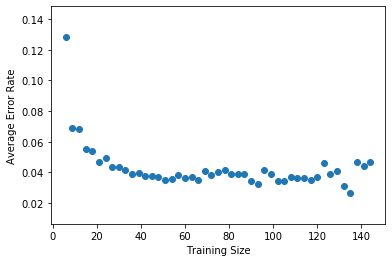

In [5]:
err_rate, training_size = [], []
#Iterate through different training sample sizes
for t_size in range(2,49):
    err = []
    for trial in range(50):
        wrong = 0
        #Pick sample to train on and corresponding holdout set
        indices = random.sample(range(0, 50), t_size)
        hold_out = list(set(range(50)) - set(indices))
        X_data = [X_1[indices], X_2[indices], X_3[indices]]
        Y_data = [Y_1[indices], Y_2[indices], Y_3[indices]]
        X_hold = [X_1[hold_out], X_2[hold_out], X_3[hold_out]]
        Y_hold = [Y_1[hold_out], Y_2[hold_out], Y_3[hold_out]]
        W_train = find_w(np.asarray(X_data), np.asarray(Y_data), 4)
        for j in range(3):
            for i in range(len(X_hold[j])):
                y_pred = np.matmul(X_hold[j][i], W_train)
                if y_pred < .5: 
                    y_pred_final = 0
                elif y_pred < 1.5:
                    y_pred_final = 1
                else: 
                    y_pred_final = 2
                if y_pred_final != Y_hold[j][i]:
                    wrong+=1
        err.append(wrong/(3*len(X_hold[0])))
    err_rate.append(np.mean(err))
    training_size.append(t_size*3)
plt.scatter(training_size, err_rate)
plt.xlabel("Training Size")
plt.ylabel("Average Error Rate")
plt.show()

### Problem Two

In [7]:
#Load data 
d_jest = sio.loadmat('jesterdata.mat') 
X = d_jest['X']

#Load known ratings y and true ratings true y 
d_new = sio.loadmat('newuser.mat') 
y = d_new['y'] 
true_y = d_new['truey']

#Total number of joke ratings should be m = 100, n = 7200 
m, n = X.shape

#Train on ratings we know for the new user 
train_indices = np.squeeze(y != -99) 
num_train = np.count_nonzero(train_indices)

#Test on ratings we don’t know 
test_indices = np.logical_not(train_indices) 
num_test = m - num_train
X_data = X[train_indices , 0:20] 
y_data = y[train_indices] 
y_test = true_y[test_indices]

Part A

Average absolute error (train): 1.4208820113919864
Sum of squared residuals: 73.8506619250308


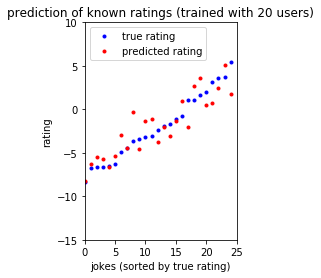

In [8]:
#Solve for weights
X_T = X_data.transpose()
XTX = np.matmul(X_T,X_data)
XTX_inverse = np.linalg.inv(XTX)
W = np.matmul(np.matmul(XTX_inverse, X_T),y_data)

#Compute predictions
y_hat_train = (np.matmul(X[train_indices, 0:20], W))

#Measure performance on training jokes
avgerr_train=np.mean(np.sqrt((y_hat_train -y_data)**2))
avg_sumsq = np.sum((y_hat_train -y_data)**2)

#Display results 
ax1 = plt.subplot(121) 
sorted_indices = np.argsort(np.squeeze(y_data)) 
ax1.plot( range(num_train), y_data[sorted_indices], 'b.', range(num_train), y_hat_train[sorted_indices], 'r.' ) 
ax1.set_title('prediction of known ratings (trained with 20 users)') 
ax1.set_xlabel('jokes (sorted by true rating)') 
ax1.set_ylabel('rating') 
ax1.legend(['true rating', 'predicted rating'], loc='upper left') 
ax1.axis([0, num_train , -15, 10])

print("Average absolute error (train):", avgerr_train)
print("Sum of squared residuals:", avg_sumsq)

Average absolute (test): 4.381403316899966
Sum of squared residuals: 2156.2537580944836


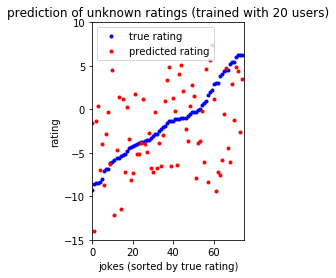

In [9]:
#Measure performance on unrated jokes
y_hat_test = np.matmul(X[test_indices, 0:20], W)
avgerr_test=np.mean(np.sqrt((y_hat_test -y_test)**2))
avg_sumsqt = np.sum((y_hat_test -y_test)**2)

#Display results 
ax2 = plt.subplot(122) 
sorted_indices = np.argsort(np.squeeze(y_test)) 
ax2.plot( range(num_test), y_test[sorted_indices], 'b.', range(num_test), y_hat_test[sorted_indices], 'r.' ) 
ax2.set_title('prediction of unknown ratings (trained with 20 users)') 
ax2.set_xlabel('jokes (sorted by true rating)') 
ax2.set_ylabel('rating') 
ax2.legend(['true rating', 'predicted rating'], loc='upper left') 
ax2.axis([0, num_test , -15, 10])
print("Average absolute (test):", avgerr_test)
print("Sum of squared residuals:", avg_sumsqt)
plt.show()

Part B

Average absolute error (train): 1.7852386235972515e-15
Sum of squared residuals: 1.1413831222416515e-28


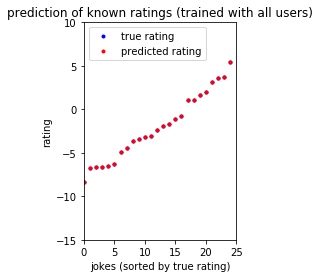

In [11]:
#Train on ratings we know for the new user 
train_indices = np.squeeze(y != -99) 
num_train = np.count_nonzero(train_indices)

#Test on ratings we don’t know 
test_indices = np.logical_not(train_indices) 
num_test = m - num_train
X_data = X[train_indices] 
y_data = y[train_indices] 
y_test = true_y[test_indices]

#Solve for weights
X_T = X_data.transpose()
XTX = np.matmul(X_data,X_T)
XTX_inverse = np.linalg.inv(XTX)
W = np.matmul(np.matmul(X_T,XTX_inverse),y_data)

#Compute predictions
y_hat_train = (np.matmul(X[train_indices], W))

#Measure performance on training jokes
avgerr_train=np.mean(np.sqrt((y_hat_train -y_data)**2))
avg_sumsq = np.sum((y_hat_train -y_data)**2)


#Display results 
ax1 = plt.subplot(121) 
sorted_indices = np.argsort(np.squeeze(y_data)) 
ax1.plot(range(num_train), y_data[sorted_indices], 'b.', range(num_train), y_hat_train[sorted_indices], 'r.' ) 
ax1.set_title('prediction of known ratings (trained with all users)') 
ax1.set_xlabel('jokes (sorted by true rating)') 
ax1.set_ylabel('rating') 
ax1.legend(['true rating', 'predicted rating'], loc='upper left') 
ax1.axis([0, num_train , -15, 10])

print("Average absolute error (train):", avgerr_train)
print("Sum of squared residuals:", avg_sumsq)

Average absolute (test): 2.8390939780678353
Sum of squared residuals: 915.7892813207045


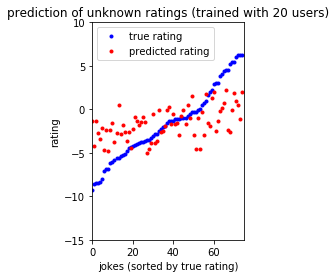

In [12]:
#Measure performance on unrated jokes
y_hat_test = (np.matmul(X[test_indices], W))
avgerr_test=np.mean(np.sqrt((y_hat_test -y_test)**2))
avg_sumsqt = np.sum((y_hat_test -y_test)**2)

#Display results 
ax2 = plt.subplot(122) 
sorted_indices = np.argsort(np.squeeze(y_test)) 
ax2.plot( range(num_test), y_test[sorted_indices], 'b.', range(num_test), y_hat_test[sorted_indices], 'r.' ) 
ax2.set_title('prediction of unknown ratings (trained with 20 users)') 
ax2.set_xlabel('jokes (sorted by true rating)') 
ax2.set_ylabel('rating') 
ax2.legend(['true rating', 'predicted rating'], loc='upper left') 
ax2.axis([0, num_test , -15, 10])
print("Average absolute (test):", avgerr_test)
print("Sum of squared residuals:", avg_sumsqt)
plt.show()

Part C

Text(0, 0.5, 'Singular Value')

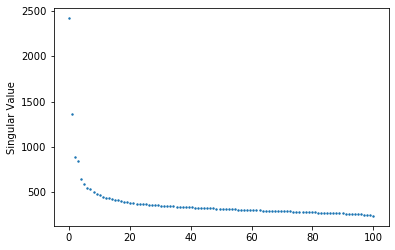

In [14]:
U,Z,Vh = np.linalg.svd(X,full_matrices=False)
x=np.linspace(0, len(Z), len(Z))
plt.scatter(x,Z,2)
plt.ylabel("Singular Value")

Part D

In [15]:
#Use power iteration method to find U, V from SVD
def power_iteration(X, runs):
    vec = np.ones((X.shape[1],1))
    for i in range(runs):
        vec1 = np.matmul(X, vec)
        vec = vec1 / np.linalg.norm(vec1)
    return vec
U1=power_iteration(np.matmul(np.array(X),np.array(X).transpose()), 100)
V1=power_iteration(np.matmul(np.array(X).transpose(),np.array(X)), 100)